In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# 1-dimensional Gray-Scott

In [5]:
nx = 100
nt = 200
dt = 0.1
u = np.zeros((nx,nt))
v = np.zeros((nx,nt))

u0 = np.random.normal(0,1,size=(nx,)) #np.sin(np.arange(nx))
v0 = np.random.normal(0,1,size=(nx,))

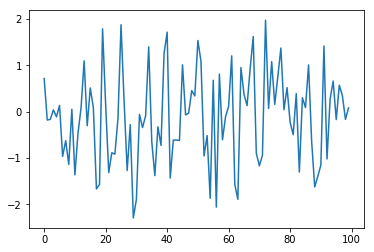

In [6]:
plt.plot(u0)

In [7]:
L = np.eye(nx, k=1) + np.eye(nx, k=-1) - np.eye(nx)*2
#L[0,0]=-1
#L[-1,-1]=-1

In [9]:
print(L)

[[-2.  1.  0. ...  0.  0.  0.]
 [ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -2.  1.  0.]
 [ 0.  0.  0. ...  1. -2.  1.]
 [ 0.  0.  0. ...  0.  1. -2.]]


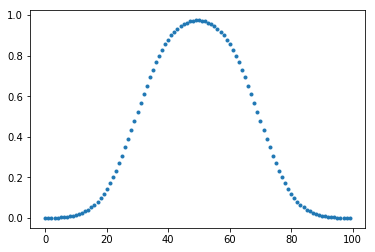

In [10]:
step = np.zeros((nx,))
step[30:70]=1
for i in range(400):
    step = step+0.1*np.dot(L,step)
plt.plot(step, '.')

In [11]:
def grayscott(u, v, L):
    f = 0.0460
    k = 0.0694
    r_u = 2e-5
    r_v = 1e-5
    dx = 1.0/146
    dx2 = dx*dx
    du = r_u*np.dot(L,u)/dx2 - u*v*v + f*(1-u)
    dv = r_v*np.dot(L,v)/dx2 + u*v*v - (f+k)*v
    return du,dv

In [12]:
u[:,0] = u0
v[:,0] = v0
for t in range(nt-1):
    dudt,dvdt = grayscott(u[:,t],v[:,t],L)
    u[:,t+1] = u[:,t] + dt*dudt
    v[:,t+1] = v[:,t] + dt*dudt

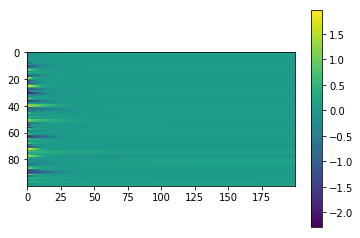

In [13]:
plt.imshow(u)
plt.colorbar()

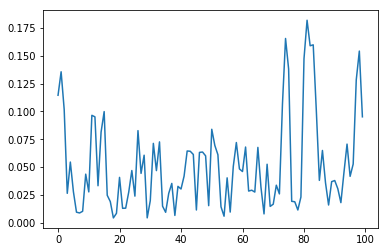

In [14]:
plt.plot(u[:,-1])

# 2-dimensional Gray-Scott

In [50]:
nx = 100
ny = 100
nt = 2000
dt = 0.01
u = np.zeros((nx,ny,nt))
v = np.zeros((nx,ny,nt))

u0 = np.random.normal(0,0.01,size=(nx,ny)) #np.sin(np.arange(nx))
v0 = np.random.normal(0,0.01,size=(nx,ny))

In [16]:
def compute_laplacian_x(x):
    # Simple computation laplacian of function x (nx,ny)
    w,h = x.shape
    Lx = np.zeros_like(x)
    for i in range(w):
        for j in range(h):
            Lx[i,j] = 4*x[i,j]
            # x neighbours
            if i>0:
                Lx[i,j] -= x[i-1,j]
            else:
                # Boundary condition
                Lx[i,j] -= x[-1,j] #for periodic
            if i<w-1:
                Lx[i,j] -= x[i+1,j]
            else:
                # Boundary condition
                Lx[i,j] -= x[0,j] #for periodic
                
            # y neighbours
            if j>0:
                Lx[i,j] -= x[i,j-1]
            else:
                # Boundary condition
                Lx[i,j] -= x[i,-1] #for periodic
            if j<w-1:
                Lx[i,j] -= x[i,j+1]
            else:
                # Boundary condition
                Lx[i,j] -= x[i,0] #for periodic
    # Return the resulting array
    return Lx*0.25

Simple test of the laplacian is diffusion, which blurs the function (array or image):

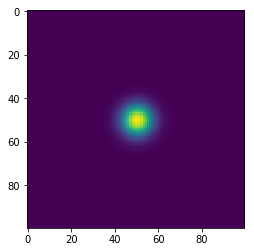

In [19]:
# Simple diffusion equation solver
uu = np.zeros_like(u0) # Our random initial condition
uu[50,50] = 1
for i in range(500):
    uu = uu - compute_laplacian_x(uu)*0.1
plt.imshow(uu)

In [20]:
def grayscott2d(u, v):
    f = 0.0460
    k = 0.0694
    r_u = 2e-5
    r_v = 1e-5
    dx = 1.0/146
    dx2 = dx*dx
    du = r_u*compute_laplacian_x(u)/dx2 - u*v*v + f*(1-u)
    dv = r_v*compute_laplacian_x(v)/dx2 + u*v*v - (f+k)*v
    return du,dv

In [51]:
u[:,:,0] = 0.044945770232700674 + np.random.normal(0,0.001,size=(nx,ny))
v[:,:,0] = 0.0875768475766362 + np.random.normal(0,0.001,size=(nx,ny))

for t in range(nt-1):
    dudt,dvdt = grayscott2d(u[:,:,t],v[:,:,t])
    u[:,:,t+1] = u[:,:,t] + dt*dudt
    v[:,:,t+1] = v[:,:,t] + dt*dudt

-0.865034216909389


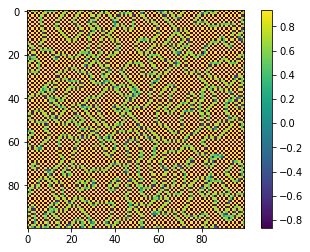

In [52]:
plt.imshow(v[:,:,-1])
plt.colorbar()
print(np.min(v[:,:,-1]))

# Eigenvectors of the laplacian matrix:

In [187]:
from numpy.linalg import eig
W,V = eig(L)
print L

[[-1.  1.  0. ...  0.  0.  0.]
 [ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -2.  1.  0.]
 [ 0.  0.  0. ...  1. -2.  1.]
 [ 0.  0.  0. ...  0.  1. -1.]]


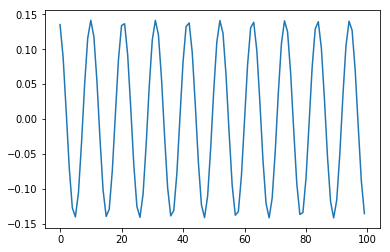

In [188]:
order = np.argsort(-W)
VV = V[:,order]
plt.plot(VV[:,19])